<a href="https://www.kaggle.com/code/shubhamgupta012/electric-vehicle-population-data?scriptVersionId=134528288" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-population-data/Electric_Vehicle_Population_Data.csv


In [2]:
df = pd.read_csv('/kaggle/input/electric-vehicle-population-data/Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
df.shape

(130443, 17)

In [4]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,130440.000000,130443.000000,130443.000000,130443.000000,130138.000000,1.304430e+05,1.304400e+05
mean,98167.633878,2019.554633,76.705718,1495.677346,29.577026,2.051796e+08,5.297177e+10
std,2492.197784,2.989137,99.421571,9844.748414,14.767508,8.710573e+07,1.640658e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.568004e+08,5.303301e+10
50%,98121.000000,2020.000000,23.000000,0.000000,34.000000,2.034934e+08,5.303303e+10
75%,98370.000000,2022.000000,151.000000,0.000000,43.000000,2.290791e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [6]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [7]:
df['County'].value_counts()

King                    68477
Snohomish               14651
Pierce                  10019
Clark                    7700
Thurston                 4694
                        ...  
Wayne                       1
Marin                       1
Dorchester                  1
Sarpy                       1
Fairbanks North Star        1
Name: County, Length: 166, dtype: int64

In [8]:
df['City'].value_counts()

Seattle        22894
Bellevue        6748
Redmond         4820
Vancouver       4652
Kirkland        4071
               ...  
Asheboro           1
Germantown         1
Saint Jacob        1
Watertown          1
Aurora             1
Name: City, Length: 656, dtype: int64

In [9]:
df['State'].value_counts()

WA    130138
CA        83
VA        35
MD        29
TX        19
CO        11
NC        10
AZ         9
IL         8
CT         7
NV         7
GA         6
OR         6
NY         6
SC         5
HI         5
NJ         5
FL         4
LA         4
DC         4
MA         3
NE         3
KS         3
AR         3
MO         2
BC         2
ID         2
OH         2
TN         2
UT         2
PA         2
WY         2
DE         1
MN         1
AL         1
KY         1
NM         1
AP         1
MS         1
WI         1
OK         1
MI         1
NH         1
IN         1
RI         1
AK         1
Name: State, dtype: int64

In [10]:
df['Make'].value_counts()

TESLA                   59629
NISSAN                  13023
CHEVROLET               11251
FORD                     6743
BMW                      5696
KIA                      5252
TOYOTA                   4770
VOLKSWAGEN               3432
VOLVO                    3113
AUDI                     2622
JEEP                     2328
HYUNDAI                  2144
CHRYSLER                 2139
RIVIAN                   1612
PORSCHE                   936
FIAT                      803
HONDA                     791
MINI                      728
MERCEDES-BENZ             711
MITSUBISHI                710
POLESTAR                  648
SMART                     276
SUBARU                    231
JAGUAR                    222
LINCOLN                   208
LUCID                     133
CADILLAC                  103
LEXUS                      64
GENESIS                    54
LAND ROVER                 41
FISKER                     14
AZURE DYNAMICS              7
TH!NK                       3
WHEEGO ELE

In [11]:
df['Model'].value_counts()

MODEL 3        25311
MODEL Y        22078
LEAF           12961
MODEL S         7399
BOLT EV         5335
               ...  
745LE              2
BENTAYGA           2
918                1
FLYING SPUR        1
S-10 PICKUP        1
Name: Model, Length: 121, dtype: int64

In [12]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60551
Eligibility unknown as battery range has not been researched    53446
Not eligible due to low battery range                           16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [13]:
top_types = df['County'].value_counts().nlargest(9).index
df['County_modified'] = df['County'].where(df['County'].isin(top_types), 'Other')
counts = df['County_modified'].value_counts()

In [14]:
counts

King         68477
Snohomish    14651
Other        12478
Pierce       10019
Clark         7700
Thurston      4694
Kitsap        4344
Whatcom       3223
Spokane       3212
Benton        1645
Name: County_modified, dtype: int64

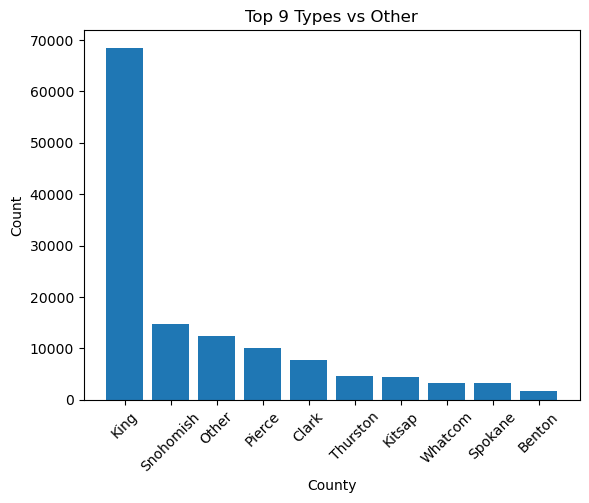

In [15]:
import matplotlib.pyplot as plt

plt.bar(counts.index, counts.values)
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Top 9 Types vs Other')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

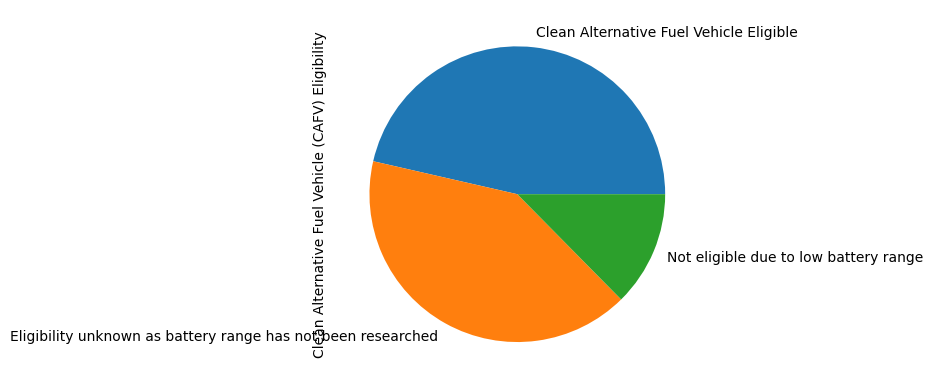

In [16]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot.pie()

In [17]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,County_modified
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,Other
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10,Kitsap
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,King
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,King
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10,Thurston


In [18]:
top_types = df['Model'].value_counts().nlargest(19).index
df['Model_Modified'] = df['Model'].where(df['Model'].isin(top_types), 'Other')
counts = df['Model_Modified'].value_counts()

In [19]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,County_modified,Model_Modified
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,Other,MODEL X
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10,Kitsap,Other
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,King,MODEL 3
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,King,LEAF
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10,Thurston,MODEL S


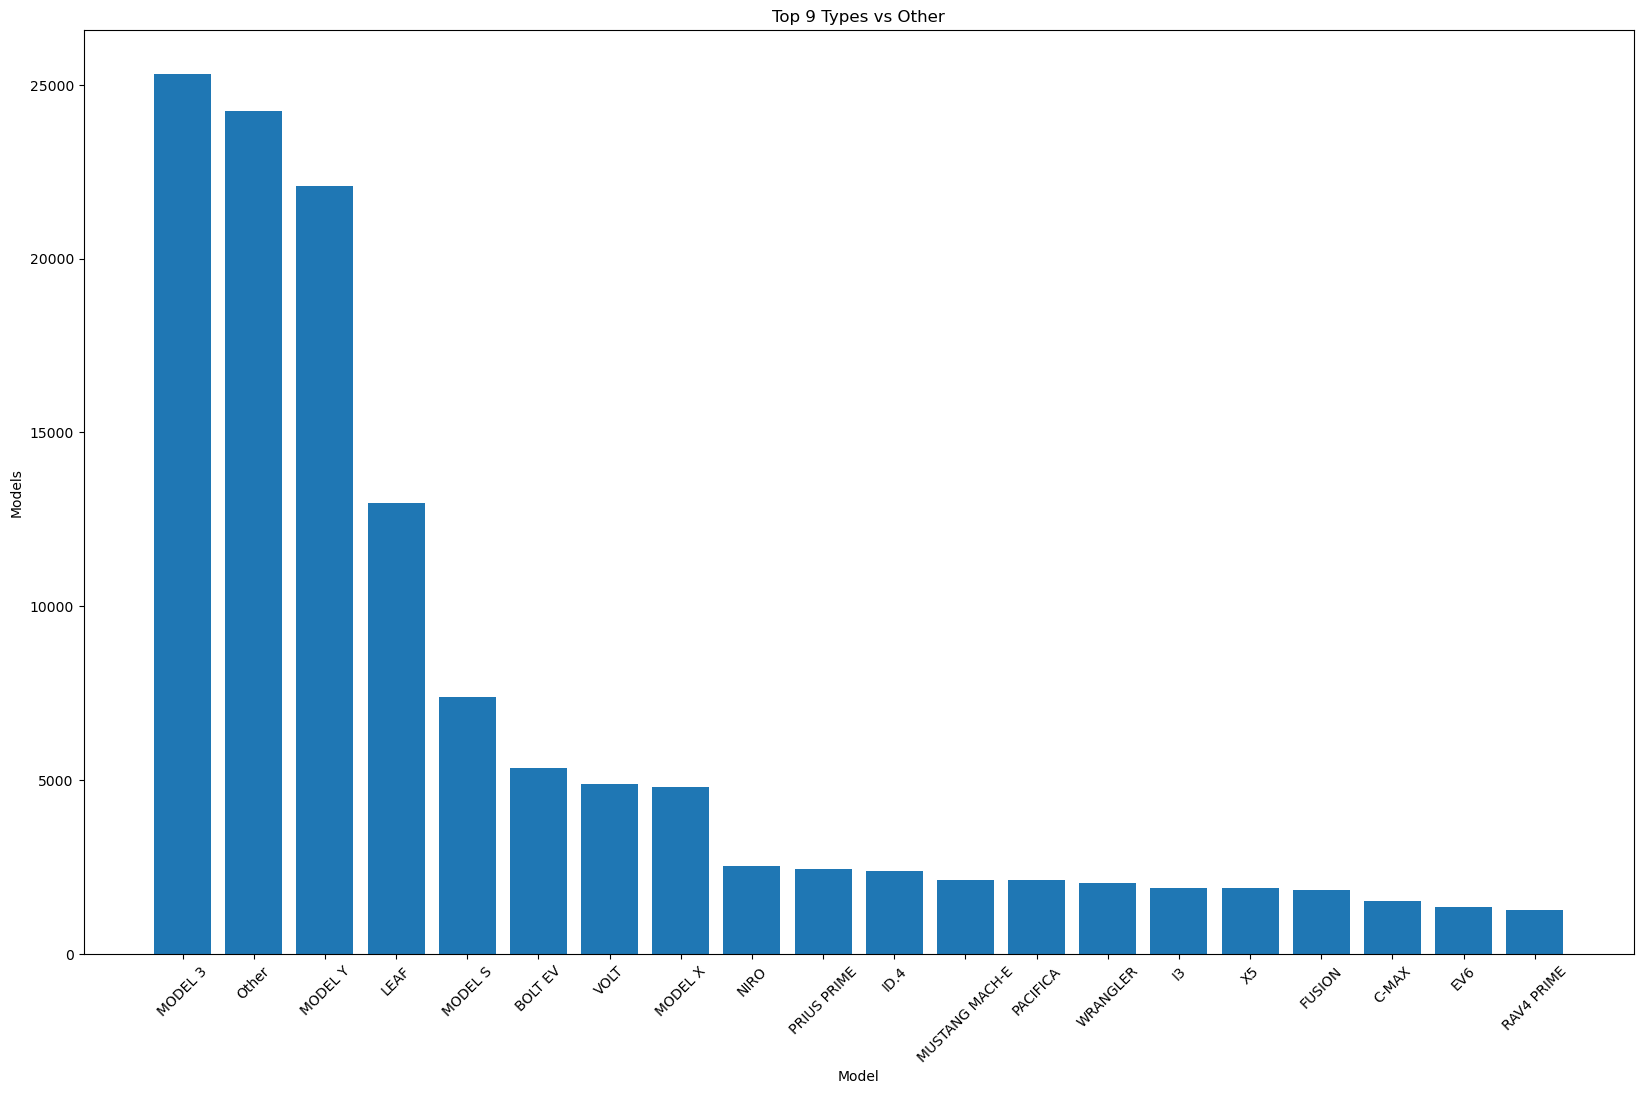

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12
                   
                   ))
plt.bar(counts.index, counts.values)
plt.xlabel('Model')
plt.ylabel('Models')
plt.title('Top 9 Types vs Other')
plt.xticks(rotation=45)
plt.show()